###  Best accuracy on UTKFacexRESNET-18
>Train 73% Val and Test ~71%
>with the below parameters:-

>> optimizer RMSprop(model.parameters(), lr=0.001, alpha=0.9) scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, 
>> gamma=0.1) criterion = torch.nn.CrossEntropyLoss() transforms = transforms.Compose([
>> transforms.Resize((224, 224)), ##Original Size 200*200 transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), >>#transforms.RandomRotation(degrees=15), transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)), transforms.ToTensor(), >>transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #Imagenet pretrianed model specific to the normalization technique])

### Imports

In [1]:
import os
import numpy as np
from PIL import Image, ImageFilter
import cv2
import torch,torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
torch.cuda.is_available()

True

In [3]:
def load_data(path, test_split, val_split, batch_size, input_size):
    
    transform_dict={'src':transforms.Compose([transforms.RandomHorizontalFlip(),
                                              transforms.Resize((224,224)),
                      transforms.RandomVerticalFlip(),
                      transforms.RandomRotation(15),
                      transforms.ToTensor(),
                      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])}
    
    data1 = datasets.ImageFolder(root=path,transform =transform_dict['src'])
    test_size=int(len(data1)*test_split)
    val_size=int(len(data1)*val_split)
    train_size=len(data1)-val_size-test_size
    train_dataset,test_dataset,val_dataset = torch.utils.data.random_split(data1,[train_size,test_size,val_size])
    data_loader_train=DataLoader(train_dataset,batch_size,shuffle=True)
    data_loader_test=DataLoader(test_dataset,batch_size,shuffle=False)
    data_loader_val=DataLoader(val_dataset,batch_size,shuffle=False)  
    return data_loader_train, data_loader_test, data_loader_val

In [4]:
train_loader,test_loader,val_loader=load_data(path=r'D:/ConcordiaU/Winter 23/AI/Project/Datasets/2. UTKFace/UTKFace/', 
                                              test_split=0.1,val_split= 0.1,batch_size=64, input_size=[224,224])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 23706 samples in 0.267s...
[t-SNE] Computed neighbors for 23706 samples in 182.678s...
[t-SNE] Computed conditional probabilities for sample 1000 / 23706
[t-SNE] Computed conditional probabilities for sample 2000 / 23706
[t-SNE] Computed conditional probabilities for sample 3000 / 23706
[t-SNE] Computed conditional probabilities for sample 4000 / 23706
[t-SNE] Computed conditional probabilities for sample 5000 / 23706
[t-SNE] Computed conditional probabilities for sample 6000 / 23706
[t-SNE] Computed conditional probabilities for sample 7000 / 23706
[t-SNE] Computed conditional probabilities for sample 8000 / 23706
[t-SNE] Computed conditional probabilities for sample 9000 / 23706
[t-SNE] Computed conditional probabilities for sample 10000 / 23706
[t-SNE] Computed conditional probabilities for sample 11000 / 23706
[t-SNE] Computed conditional probabilities for sample 12000 / 23706
[t-SNE] Computed conditional probabilities for 

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_core.py:882: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  val in data


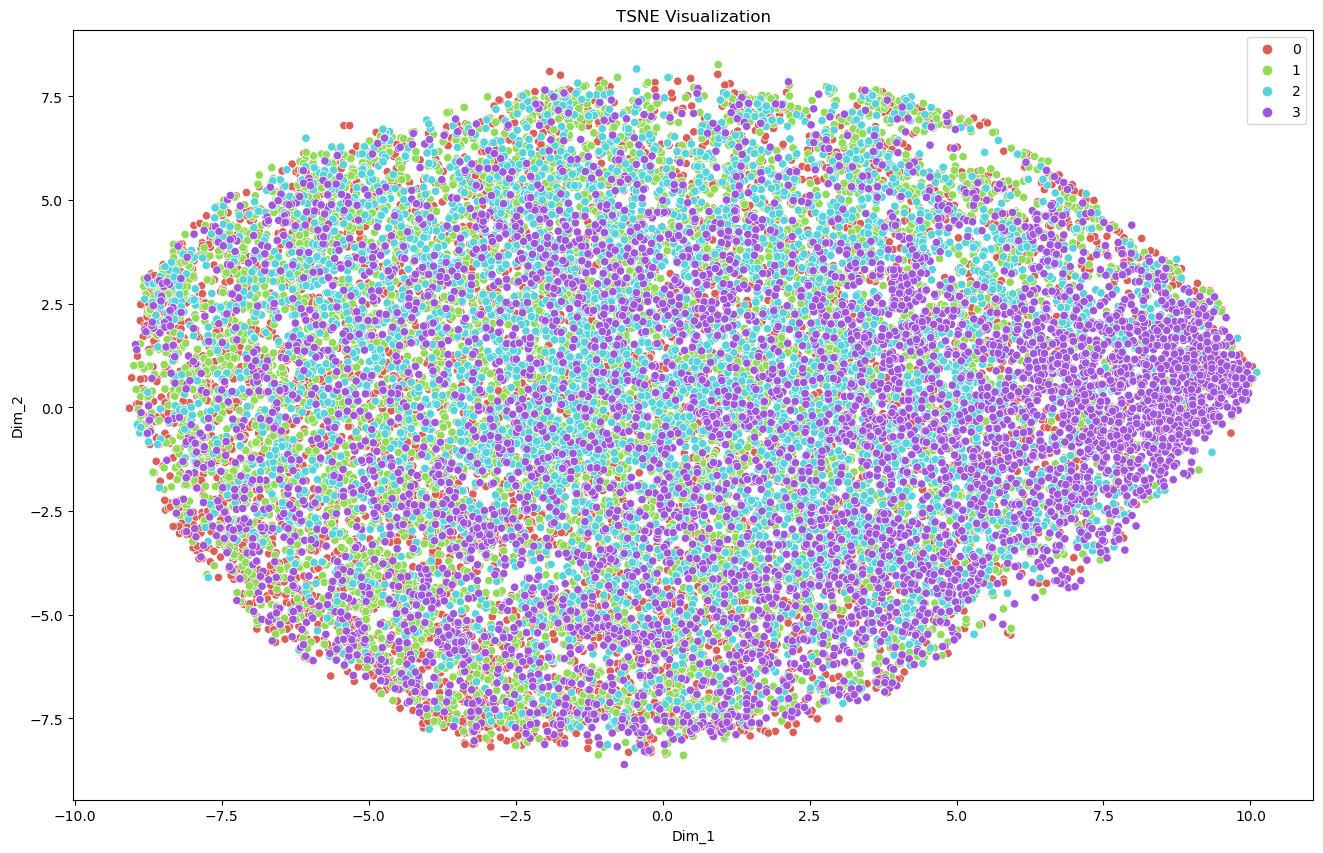

In [14]:
data=datasets.ImageFolder(root=r'D:/ConcordiaU/Winter 23/AI/Project/Datasets/2. UTKFace/UTKFace/')
random=0
X=[]
Y=[]
for x,y in data:
                          xrs=x.resize((64,64))
                          img=np.array(xrs).reshape(64*64*3)
                          X.append(img)
                          Y.append(y)
arrX=np.array(X)
arrY=np.array(Y)

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(arrX)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(tsne[:,0],tsne[:,1],hue=Y,palette=sns.color_palette("hls", 4),data=data,legend="full")
# Using Plt.scatter, visualize the transformed data marked with their corresponding label in 2D embedding.
plt.title('TSNE Visualization')
plt.xlabel('Dim_1')
plt.ylabel('Dim_2')
plt.show()
plt.close()

In [5]:
model = torchvision.models.resnet18(pretrained=False, num_classes=4)

optimizer = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1) # Try to drop
criterion = torch.nn.CrossEntropyLoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

C:\Users\suppu\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\suppu\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [6]:
num_epochs = 50
train_losses = []
train_accs = []
val_accs = []
val_losses = []


patience = 10 
delta = 0.001 
best_val_loss = float('inf')
best_model_state_dict = None
counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        val_loss = 0.0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        
        val_loss /= len(val_loader.dataset) #Val loss and acc for each epoch
        val_acc = 100 * correct / total
        
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%')

#         if val_loss < best_val_loss - delta: # validation loss improvement
#             best_val_loss = val_loss
#             best_model_state_dict = model.state_dict()
#             counter = 0
#         else:
#             counter += 1
#             if counter >= patience:
#                 print("Validation loss hasn't improved for {} epochs. Stopping early.".format(patience))
#                 break


#model.load_state_dict(best_model_state_dict) #Load the best model to eval on test
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
    

Epoch 1/50, Train Loss: 1.3230, Train Accuracy: 38.22%, Validation Loss: 0.0262, Validation Accuracy: 35.27%
Epoch 2/50, Train Loss: 1.1203, Train Accuracy: 49.30%, Validation Loss: 0.0257, Validation Accuracy: 39.58%
Epoch 3/50, Train Loss: 1.0153, Train Accuracy: 54.13%, Validation Loss: 0.0259, Validation Accuracy: 36.50%
Epoch 4/50, Train Loss: 0.9643, Train Accuracy: 57.20%, Validation Loss: 0.0161, Validation Accuracy: 55.99%
Epoch 5/50, Train Loss: 0.9237, Train Accuracy: 58.87%, Validation Loss: 0.0462, Validation Accuracy: 34.39%
Epoch 6/50, Train Loss: 0.8970, Train Accuracy: 59.54%, Validation Loss: 0.0203, Validation Accuracy: 47.34%
Epoch 7/50, Train Loss: 0.8667, Train Accuracy: 61.12%, Validation Loss: 0.0148, Validation Accuracy: 58.82%
Epoch 8/50, Train Loss: 0.8431, Train Accuracy: 62.71%, Validation Loss: 0.0282, Validation Accuracy: 43.54%
Epoch 9/50, Train Loss: 0.8174, Train Accuracy: 63.73%, Validation Loss: 0.0146, Validation Accuracy: 58.06%
Epoch 10/50, Train 

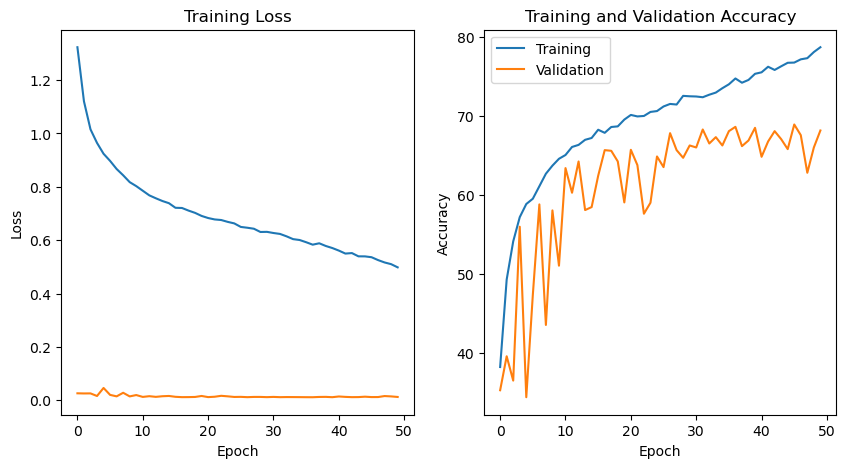

In [7]:
# Plot training accuracy and loss
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_losses,label='Training')
plt.plot(val_losses, label='Validation')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(train_accs, label='Training')
plt.plot(val_accs, label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [8]:
# Evaluation on test set and ROC curve
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # For ROC curve
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(outputs.cpu().numpy())  # Predicted probabilities for all classes

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy}')
# Save the model
torch.save(model.state_dict(), 'face_age_detection_resnet18_4th.1_Try.pth')

Test Accuracy: 70.25316455696202


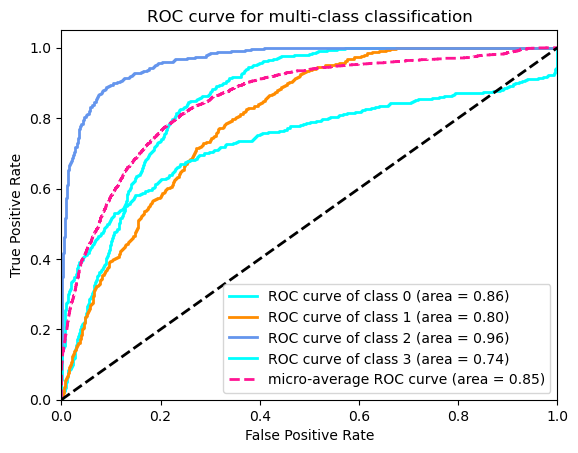

In [9]:
from sklearn.metrics import roc_curve, auc
num_classes = 4
# Convert labels to one-hot encoding
y_true_onehot = label_binarize(y_true, classes=np.arange(num_classes))

# Convert y_pred list to numpy array
y_pred = np.array(y_pred)

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_onehot.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class and micro-average
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw, linestyle='--',
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multi-class classification')
plt.legend(loc="lower right")
plt.show()


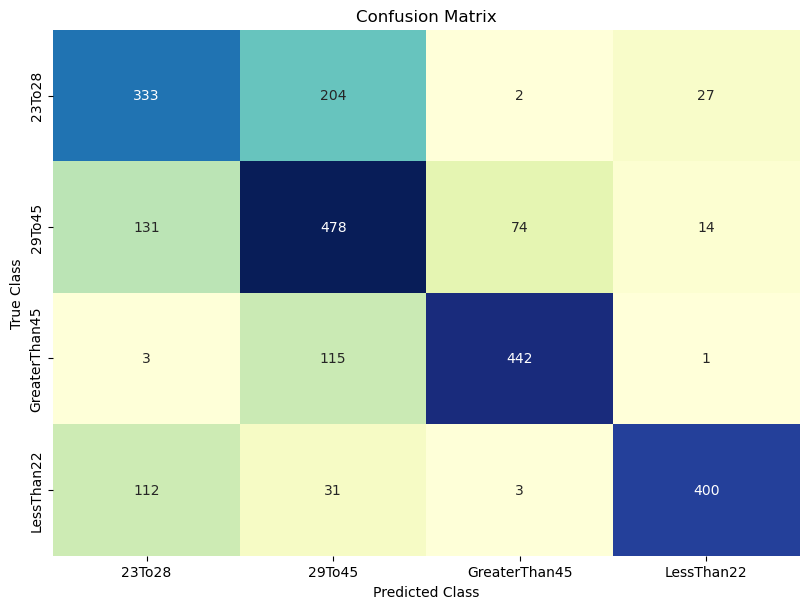

In [11]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
y_true = []
y_pred = []
for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        y_true.extend(labels.cpu().numpy())

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())

cf_matrix = confusion_matrix(y_true, y_pred)
class_names = ('23To28', '29To45', 'GreaterThan45', 'LessThan22')
 
# Create pandas dataframe
dataframe = pd.DataFrame(cf_matrix, index=class_names, columns=class_names)

plt.figure(figsize=(8, 6))
 
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None,cmap="YlGnBu",fmt="d")
 
plt.title("Confusion Matrix"), plt.tight_layout()
 
plt.ylabel("True Class"),
plt.xlabel("Predicted Class")
plt.show()

In [ ]:
###########################################

In [7]:
model = torchvision.models.resnet18(pretrained=False, num_classes=4)

optimizer = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1) # Try to drop
criterion = torch.nn.CrossEntropyLoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

C:\Users\suppu\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\suppu\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Epoch 1/50, Train Loss: 1.3446, Train Accuracy: 36.40%, Validation Loss: 0.0379, Validation Accuracy: 45.27%
Epoch 2/50, Train Loss: 1.0541, Train Accuracy: 52.44%, Validation Loss: 0.0308, Validation Accuracy: 56.08%
Epoch 3/50, Train Loss: 0.9376, Train Accuracy: 58.11%, Validation Loss: 0.0285, Validation Accuracy: 57.98%
Epoch 4/50, Train Loss: 0.8763, Train Accuracy: 60.70%, Validation Loss: 0.0312, Validation Accuracy: 58.45%
Epoch 5/50, Train Loss: 0.8326, Train Accuracy: 63.04%, Validation Loss: 0.0288, Validation Accuracy: 59.04%
Epoch 6/50, Train Loss: 0.8049, Train Accuracy: 64.01%, Validation Loss: 0.0248, Validation Accuracy: 62.16%
Epoch 7/50, Train Loss: 0.7757, Train Accuracy: 65.53%, Validation Loss: 0.0242, Validation Accuracy: 64.15%
Epoch 8/50, Train Loss: 0.7505, Train Accuracy: 66.70%, Validation Loss: 0.0224, Validation Accuracy: 68.37%
Epoch 9/50, Train Loss: 0.7281, Train Accuracy: 67.87%, Validation Loss: 0.0262, Validation Accuracy: 63.13%
Epoch 10/50, Train 

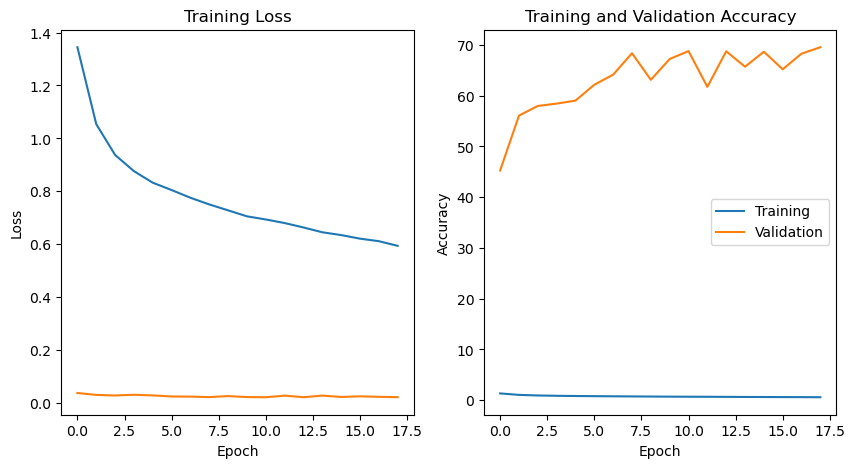

In [8]:
num_epochs = 50
train_losses = []
train_accs = []
val_accs = []
val_losses = []


patience = 10 
delta = 0.001 
best_val_loss = float('inf')
best_model_state_dict = None
counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        val_loss = 0.0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        
        val_loss /= len(val_loader.dataset) #Val loss and acc for each epoch
        val_acc = 100 * correct / total
        
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%')

        if val_loss < best_val_loss - delta: # validation loss improvement
            best_val_loss = val_loss
            best_model_state_dict = model.state_dict()
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print("Validation loss hasn't improved for {} epochs. Stopping early.".format(patience))
                break


model.load_state_dict(best_model_state_dict) #Load the best model to eval on test
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
    
#     Epoch 1/50, Train Loss: 1.3446, Train Accuracy: 36.40%, Validation Loss: 0.0379, Validation Accuracy: 45.27%
# Epoch 2/50, Train Loss: 1.0541, Train Accuracy: 52.44%, Validation Loss: 0.0308, Validation Accuracy: 56.08%
# Epoch 3/50, Train Loss: 0.9376, Train Accuracy: 58.11%, Validation Loss: 0.0285, Validation Accuracy: 57.98%
# Epoch 4/50, Train Loss: 0.8763, Train Accuracy: 60.70%, Validation Loss: 0.0312, Validation Accuracy: 58.45%
# Epoch 5/50, Train Loss: 0.8326, Train Accuracy: 63.04%, Validation Loss: 0.0288, Validation Accuracy: 59.04%
# Epoch 6/50, Train Loss: 0.8049, Train Accuracy: 64.01%, Validation Loss: 0.0248, Validation Accuracy: 62.16%
# Epoch 7/50, Train Loss: 0.7757, Train Accuracy: 65.53%, Validation Loss: 0.0242, Validation Accuracy: 64.15%
# Epoch 8/50, Train Loss: 0.7505, Train Accuracy: 66.70%, Validation Loss: 0.0224, Validation Accuracy: 68.37%
# Epoch 9/50, Train Loss: 0.7281, Train Accuracy: 67.87%, Validation Loss: 0.0262, Validation Accuracy: 63.13%
# Epoch 10/50, Train Loss: 0.7056, Train Accuracy: 68.97%, Validation Loss: 0.0225, Validation Accuracy: 67.23%
# Epoch 11/50, Train Loss: 0.6937, Train Accuracy: 69.46%, Validation Loss: 0.0220, Validation Accuracy: 68.79%
# Epoch 12/50, Train Loss: 0.6802, Train Accuracy: 69.79%, Validation Loss: 0.0280, Validation Accuracy: 61.74%
# Epoch 13/50, Train Loss: 0.6635, Train Accuracy: 70.71%, Validation Loss: 0.0220, Validation Accuracy: 68.75%
# Epoch 14/50, Train Loss: 0.6453, Train Accuracy: 71.63%, Validation Loss: 0.0280, Validation Accuracy: 65.71%
# Epoch 15/50, Train Loss: 0.6347, Train Accuracy: 71.93%, Validation Loss: 0.0229, Validation Accuracy: 68.67%
# Epoch 16/50, Train Loss: 0.6212, Train Accuracy: 72.91%, Validation Loss: 0.0253, Validation Accuracy: 65.20%
# Epoch 17/50, Train Loss: 0.6116, Train Accuracy: 73.36%, Validation Loss: 0.0235, Validation Accuracy: 68.29%
# Epoch 18/50, Train Loss: 0.5941, Train Accuracy: 73.86%, Validation Loss: 0.0222, Validation Accuracy: 69.55%
# Validation loss hasn't improved for 10 epochs. Stopping early.
# Test Accuracy: 70.19%

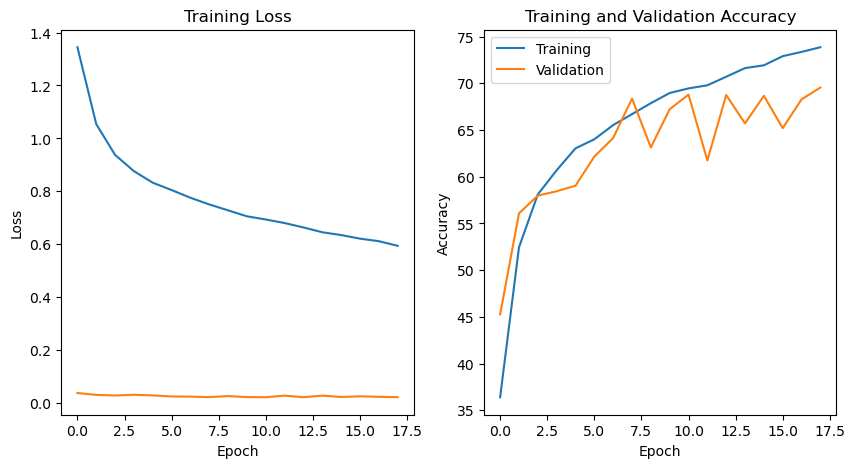

In [9]:
# Plot training accuracy and loss
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_losses,label='Training')
plt.plot(val_losses, label='Validation')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(train_accs, label='Training')
plt.plot(val_accs, label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [12]:
# Evaluation on test set and ROC curve
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # For ROC curve
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(outputs.cpu().numpy())  # Predicted probabilities for all classes

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy}')
# Save the model
torch.save(model.state_dict(), 'face_age_detection_resnet18_4th.1_Try.pth')

Test Accuracy: 71.03157894736842


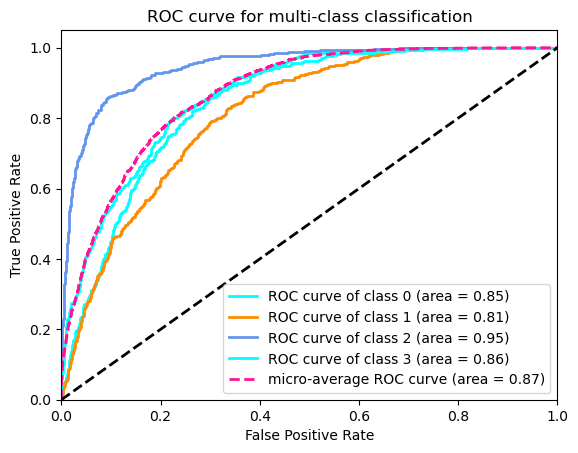

In [13]:
from sklearn.metrics import roc_curve, auc
num_classes = 4
# Convert labels to one-hot encoding
y_true_onehot = label_binarize(y_true, classes=np.arange(num_classes))

# Convert y_pred list to numpy array
y_pred = np.array(y_pred)

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_onehot.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class and micro-average
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw, linestyle='--',
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multi-class classification')
plt.legend(loc="lower right")
plt.show()


### RESNET-18 with MSELoss

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the ResNet18 model with a modified final layer
model = models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 1),
    nn.Softmax(dim=1)
).to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [ ]:
# Train the model
num_epochs = 50
train_losses = []
train_accs = []
val_accs = []
val_losses = []

patience = 10 
delta = 0.001 
best_val_loss = float('inf')
best_model_state_dict = None
counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        outputs = outputs.squeeze() # remove the extra dimension from the output
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        val_loss = 0.0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            outputs = outputs.squeeze() # remove the extra dimension from the output
            loss = criterion(outputs, labels.float())
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        
        val_loss /= len(val_loader.dataset) #Val loss and acc for each epoch
        val_acc = 100 * correct / total
        
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%')
        
        if val_loss < best_val_loss - delta: # validation loss improvement
            best_val_loss = val_loss
            best_model_state_dict = model.state_dict()
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print("Validation loss hasn't improved for {} epochs. Stopping early.".format(patience))
                break


model.load_state_dict(best_model_state_dict) #Load the best model to eval on test
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

In [ ]:
# Plot training accuracy and loss
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_losses,label='Training')
plt.plot(val_losses, label='Validation')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(train_accs, label='Training')
plt.plot(val_accs, label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# Evaluation on test set and ROC curve
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # For ROC curve
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(outputs.cpu().numpy())  # Predicted probabilities for all classes

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:W.2f}%')
# Save the model
torch.save(model.state_dict(), 'face_age_detection_resnet18_4th.1_Try.pth')

In [ ]:
from sklearn.metrics import roc_curve, auc
num_classes = 4
# Convert labels to one-hot encoding
y_true_onehot = label_binarize(y_true, classes=np.arange(num_classes))

# Convert y_pred list to numpy array
y_pred = np.array(y_pred)

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_onehot.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class and micro-average
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw, linestyle='--',
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multi-class classification')
plt.legend(loc="lower right")
plt.show()


#### 4.3 different split dataset (different seed of train-test-val)

In [9]:
model = torchvision.models.resnet18(pretrained=False, num_classes=4)

optimizer = optim.Adam(model.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
criterion = torch.nn.CrossEntropyLoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

C:\Users\suppu\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\suppu\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [10]:
num_epochs = 50
train_losses = []
train_accs = []
val_accs = []
val_losses = []


patience = 10 
delta = 0.001 
best_val_loss = float('inf')
best_model_state_dict = None
counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        val_loss = 0.0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        
        val_loss /= len(val_loader.dataset) #Val loss and acc for each epoch
        val_acc = 100 * correct / total
        
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%')

        if val_loss < best_val_loss - delta: # validation loss improvement
            best_val_loss = val_loss
            best_model_state_dict = model.state_dict()
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print("Validation loss hasn't improved for {} epochs. Stopping early.".format(patience))
                break


model.load_state_dict(best_model_state_dict) #Load the best model to eval on test
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

Epoch 1/50, Train Loss: 1.4870, Train Accuracy: 28.85%, Validation Loss: 0.0428, Validation Accuracy: 28.38%
Epoch 2/50, Train Loss: 1.3657, Train Accuracy: 30.21%, Validation Loss: 0.0422, Validation Accuracy: 30.24%
Epoch 3/50, Train Loss: 1.3599, Train Accuracy: 31.15%, Validation Loss: 0.0418, Validation Accuracy: 34.59%
Epoch 4/50, Train Loss: 1.3378, Train Accuracy: 33.51%, Validation Loss: 0.0434, Validation Accuracy: 32.64%
Epoch 5/50, Train Loss: 1.2152, Train Accuracy: 42.07%, Validation Loss: 0.0386, Validation Accuracy: 46.28%
Epoch 6/50, Train Loss: 1.0972, Train Accuracy: 49.64%, Validation Loss: 0.0409, Validation Accuracy: 45.48%
Epoch 7/50, Train Loss: 1.0345, Train Accuracy: 53.03%, Validation Loss: 0.0364, Validation Accuracy: 46.75%
Epoch 8/50, Train Loss: 0.9933, Train Accuracy: 55.15%, Validation Loss: 0.0296, Validation Accuracy: 57.26%
Epoch 9/50, Train Loss: 0.9582, Train Accuracy: 56.91%, Validation Loss: 0.0295, Validation Accuracy: 56.76%
Epoch 10/50, Train 

KeyboardInterrupt: 

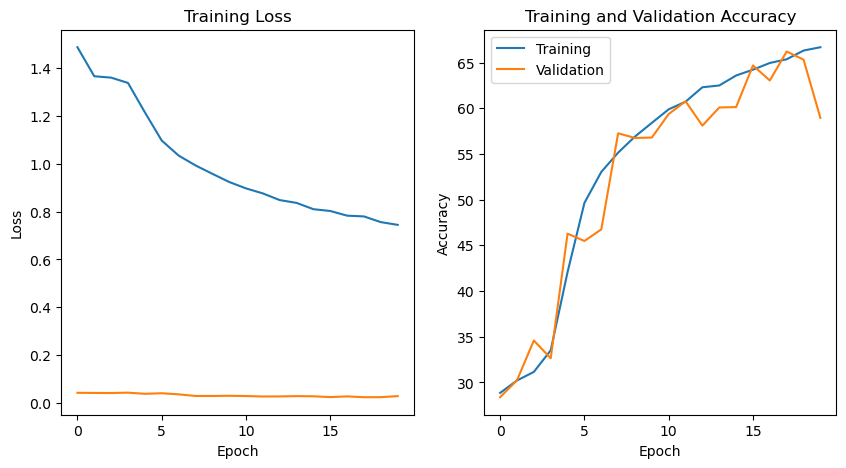

In [11]:
# Plot training accuracy and loss
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_losses,label='Training')
plt.plot(val_losses, label='Validation')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(train_accs, label='Training')
plt.plot(val_accs, label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [12]:
# Evaluation on test set and ROC curve
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # For ROC curve
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(outputs.cpu().numpy())  # Predicted probabilities for all classes

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:W.2f}%')
# Save the model
torch.save(model.state_dict(), 'face_age_detection_resnet18_4th.1_Try.pth')

ValueError: Invalid format specifier

In [ ]:
from sklearn.metrics import roc_curve, auc
num_classes = 4
# Convert labels to one-hot encoding
y_true_onehot = label_binarize(y_true, classes=np.arange(num_classes))

# Convert y_pred list to numpy array
y_pred = np.array(y_pred)

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_onehot.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class and micro-average
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw, linestyle='--',
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multi-class classification')
plt.legend(loc="lower right")
plt.show()


### 4.2 RESNET with Label Smoothing Loss

In [8]:
### label Smoothing Loss

import torch.nn.functional as F

class LabelSmoothingLoss(torch.nn.Module):
    def __init__(self, smoothing=0.1):
        super(LabelSmoothingLoss, self).__init__()
        self.smoothing = smoothing
    
    def forward(self, input, target):
        n_classes = input.size(1)
        target_one_hot = F.one_hot(target, num_classes=n_classes).float()
        target_smoothed = (1 - self.smoothing) * target_one_hot + self.smoothing / n_classes
        log_probs = F.log_softmax(input, dim=1)
        loss = - (log_probs * target_smoothed).sum(dim=1).mean()
        return loss

model = torchvision.models.resnet18(pretrained=False, num_classes=4)

optimizer = optim.Adam(model.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
criterion = LabelSmoothingLoss(smoothing=0.1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

C:\Users\suppu\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\suppu\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [9]:
import torch.nn.functional as F

class LabelSmoothingLoss(torch.nn.Module):
    def __init__(self, smoothing=0.1):
        super(LabelSmoothingLoss, self).__init__()
        self.smoothing = smoothing
    
    def forward(self, input, target):
        n_classes = input.size(1)
        target_one_hot = F.one_hot(target, num_classes=n_classes).float()
        target_smoothed = (1 - self.smoothing) * target_one_hot + self.smoothing / n_classes
        log_probs = F.log_softmax(input, dim=1)
        loss = - (log_probs * target_smoothed).sum(dim=1).mean()
        return loss

model = torchvision.models.resnet18(pretrained=False, num_classes=4)

optimizer = optim.Adam(model.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
criterion = LabelSmoothingLoss(smoothing=0.1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 50
train_losses = []
train_accs = []
val_accs = []
val_losses = []

patience = 10 
delta = 0.001 
best_val_loss = float('inf')
best_model_state_dict = None
counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        val_loss = 0.0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        
        val_loss /= len(val_loader.dataset) #Val loss and acc for each epoch
        val_acc = 100 * correct / total
        
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%')

        if val_loss < best_val_loss - delta: # validation loss improvement
            best_val_loss = val_loss
            best_model_state_dict = model.state_dict()
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print("Validation loss hasn't improved for {} epochs. Stopping early.".format(patience))
                break


model.load_state_dict(best_model_state_dict) #Load the best model to eval on
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

Epoch 1/50, Train Loss: 1.4705, Train Accuracy: 28.06%, Validation Loss: 0.0426, Validation Accuracy: 33.53%
Epoch 2/50, Train Loss: 1.3566, Train Accuracy: 32.70%, Validation Loss: 0.0425, Validation Accuracy: 35.64%
Epoch 3/50, Train Loss: 1.3070, Train Accuracy: 36.82%, Validation Loss: 0.0399, Validation Accuracy: 39.65%
Epoch 4/50, Train Loss: 1.2529, Train Accuracy: 42.11%, Validation Loss: 0.0406, Validation Accuracy: 42.06%
Epoch 5/50, Train Loss: 1.2073, Train Accuracy: 45.86%, Validation Loss: 0.0423, Validation Accuracy: 38.22%
Epoch 6/50, Train Loss: 1.1777, Train Accuracy: 47.88%, Validation Loss: 0.0392, Validation Accuracy: 41.85%
Epoch 7/50, Train Loss: 1.1431, Train Accuracy: 50.75%, Validation Loss: 0.0358, Validation Accuracy: 50.34%
Epoch 8/50, Train Loss: 1.0821, Train Accuracy: 55.02%, Validation Loss: 0.0329, Validation Accuracy: 58.15%
Epoch 9/50, Train Loss: 1.0431, Train Accuracy: 57.97%, Validation Loss: 0.0328, Validation Accuracy: 58.28%
Epoch 10/50, Train 

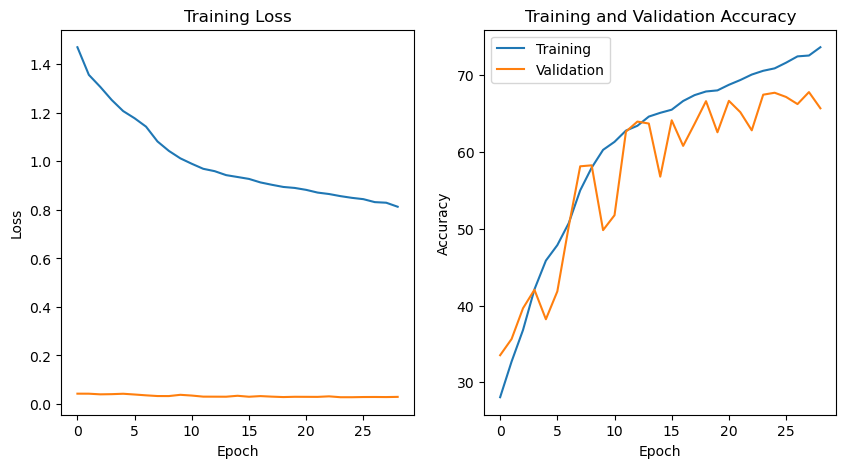

In [10]:
# Plot training accuracy and loss
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_losses,label='Training')
plt.plot(val_losses, label='Validation')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(train_accs, label='Training')
plt.plot(val_accs, label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [11]:
# Evaluation on test set and ROC curve
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # For ROC curve
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(outputs.cpu().numpy())  # Predicted probabilities for all classes

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:W.2f}%')
# Save the model
torch.save(model.state_dict(), 'face_age_detection_resnet18_4th.1_Try.pth')

Test Accuracy: 65.39%


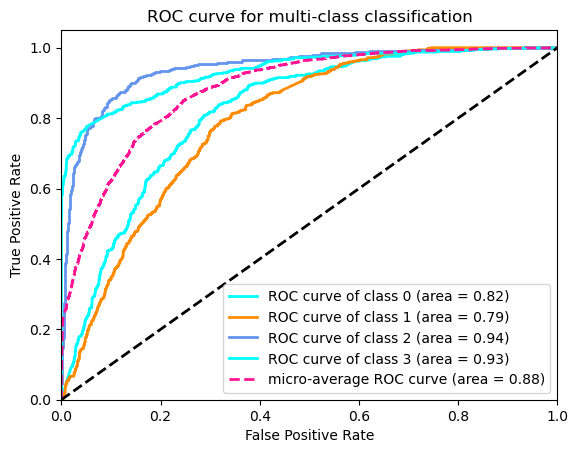

In [12]:
from sklearn.metrics import roc_curve, auc
num_classes = 4
# Convert labels to one-hot encoding
y_true_onehot = label_binarize(y_true, classes=np.arange(num_classes))

# Convert y_pred list to numpy array
y_pred = np.array(y_pred)

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_onehot.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class and micro-average
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw, linestyle='--',
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multi-class classification')
plt.legend(loc="lower right")
plt.show()


### END

### 4.1
> need to try Label Smoothing Loss.

In [8]:
model = torchvision.models.resnet18(pretrained=False, num_classes=4)

optimizer = optim.Adam(model.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
criterion = torch.nn.CrossEntropyLoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


C:\Users\suppu\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\suppu\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [9]:
num_epochs = 50
train_losses = []
train_accs = []
val_accs = []
val_losses = []


patience = 10 
delta = 0.001 
best_val_loss = float('inf')
best_model_state_dict = None
counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        val_loss = 0.0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        
        val_loss /= len(val_loader.dataset) #Val loss and acc for each epoch
        val_acc = 100 * correct / total
        
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%')

        if val_loss < best_val_loss - delta: # validation loss improvement
            best_val_loss = val_loss
            best_model_state_dict = model.state_dict()
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print("Validation loss hasn't improved for {} epochs. Stopping early.".format(patience))
                break


model.load_state_dict(best_model_state_dict) #Load the best model to eval on test
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

Epoch 1/50, Train Loss: 1.4599, Train Accuracy: 31.94%, Validation Loss: 0.0422, Validation Accuracy: 33.36%
Epoch 2/50, Train Loss: 1.2723, Train Accuracy: 38.48%, Validation Loss: 0.0452, Validation Accuracy: 33.45%
Epoch 3/50, Train Loss: 1.1692, Train Accuracy: 44.82%, Validation Loss: 0.0383, Validation Accuracy: 42.74%
Epoch 4/50, Train Loss: 1.1082, Train Accuracy: 48.26%, Validation Loss: 0.0428, Validation Accuracy: 35.90%
Epoch 5/50, Train Loss: 1.0612, Train Accuracy: 50.60%, Validation Loss: 0.0334, Validation Accuracy: 49.49%
Epoch 6/50, Train Loss: 1.0149, Train Accuracy: 52.76%, Validation Loss: 0.0512, Validation Accuracy: 37.71%
Epoch 7/50, Train Loss: 0.9694, Train Accuracy: 56.00%, Validation Loss: 0.0287, Validation Accuracy: 58.11%
Epoch 8/50, Train Loss: 0.9330, Train Accuracy: 57.71%, Validation Loss: 0.0296, Validation Accuracy: 58.19%
Epoch 9/50, Train Loss: 0.9042, Train Accuracy: 58.81%, Validation Loss: 0.0377, Validation Accuracy: 49.41%
Epoch 10/50, Train 

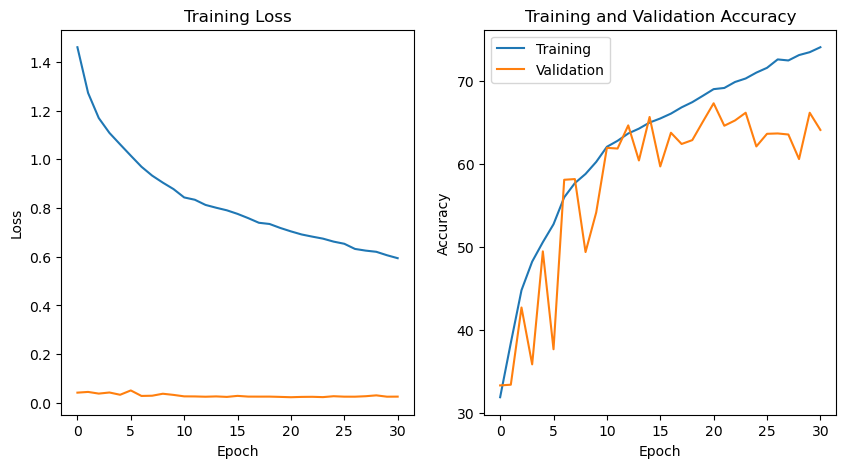

In [10]:
num_epochs = 50
train_losses = []
train_accs = []
val_accs = []
val_losses = []


patience = 10 
delta = 0.001 
best_val_loss = float('inf')
best_model_state_dict = None
counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        val_loss = 0.0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        
        val_loss /= len(val_loader.dataset) #Val loss and acc for each epoch
        val_acc = 100 * correct / total
        
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%')

        if val_loss < best_val_loss - delta: # validation loss improvement
            best_val_loss = val_loss
            best_model_state_dict = model.state_dict()
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print("Validation loss hasn't improved for {} epochs. Stopping early.".format(patience))
                break


model.load_state_dict(best_model_state_dict) #Load the best model to eval on test
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
# Plot training accuracy and loss
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_losses,label='Training')
plt.plot(val_losses, label='Validation')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(train_accs, label='Training')
plt.plot(val_accs, label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()



In [11]:
# Evaluation on test set and ROC curve
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # For ROC curve
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(outputs.cpu().numpy())  # Predicted probabilities for all classes

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
# Save the model
torch.save(model.state_dict(), 'face_age_detection_resnet18_4th.1_Try.pth')

Test Accuracy: 64.63%


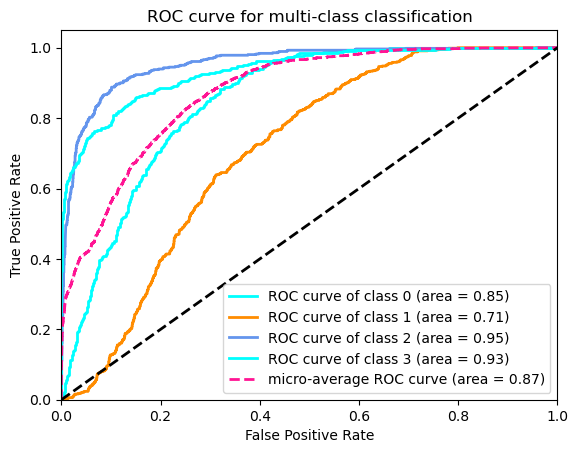

In [12]:
from sklearn.metrics import roc_curve, auc
num_classes = 4
# Convert labels to one-hot encoding
y_true_onehot = label_binarize(y_true, classes=np.arange(num_classes))

# Convert y_pred list to numpy array
y_pred = np.array(y_pred)

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_onehot.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class and micro-average
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw, linestyle='--',
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multi-class classification')
plt.legend(loc="lower right")
plt.show()


### 4th Try - with lr_scheduler.StepLR Strp 5 and gamma 0.1

>Learning rate will be reduced by a factor of 10 every 5 epochs.


Epoch 1/50, Train Loss: 1.3968, Train Accuracy: 33.95%, Validation Loss: 0.0203, Validation Accuracy: 38.47%
Epoch 2/50, Train Loss: 1.2220, Train Accuracy: 43.35%, Validation Loss: 0.0192, Validation Accuracy: 43.75%
Epoch 3/50, Train Loss: 1.1025, Train Accuracy: 49.68%, Validation Loss: 0.0194, Validation Accuracy: 45.61%
Epoch 4/50, Train Loss: 1.0343, Train Accuracy: 53.37%, Validation Loss: 0.0172, Validation Accuracy: 51.27%
Epoch 5/50, Train Loss: 0.9554, Train Accuracy: 57.70%, Validation Loss: 0.0148, Validation Accuracy: 58.87%
Epoch 6/50, Train Loss: 0.8922, Train Accuracy: 60.18%, Validation Loss: 0.0403, Validation Accuracy: 30.95%
Epoch 7/50, Train Loss: 0.8467, Train Accuracy: 62.47%, Validation Loss: 0.0229, Validation Accuracy: 41.89%
Epoch 8/50, Train Loss: 0.8127, Train Accuracy: 63.91%, Validation Loss: 0.0161, Validation Accuracy: 55.15%
Epoch 9/50, Train Loss: 0.7894, Train Accuracy: 64.75%, Validation Loss: 0.0127, Validation Accuracy: 63.81%
Epoch 10/50, Train 

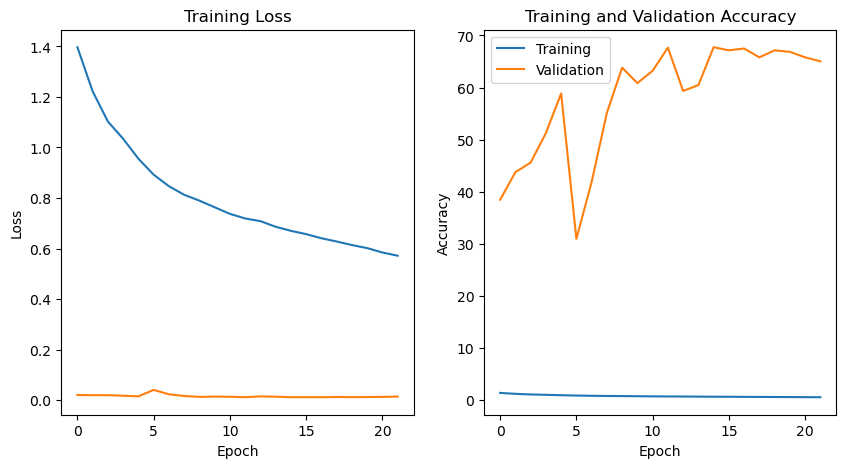

In [9]:
num_epochs = 50
train_losses = []
train_accs = []
val_accs = []
val_losses = []


patience = 10 
delta = 0.001 
best_val_loss = float('inf')
best_model_state_dict = None
counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        val_loss = 0.0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        
        val_loss /= len(val_loader.dataset) #Val loss and acc for each epoch
        val_acc = 100 * correct / total
        
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%')

        if val_loss < best_val_loss - delta: # validation loss improvement
            best_val_loss = val_loss
            best_model_state_dict = model.state_dict()
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print("Validation loss hasn't improved for {} epochs. Stopping early.".format(patience))
                break


model.load_state_dict(best_model_state_dict) #Load the best model to eval on test
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

# Plot training accuracy and loss
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_losses,label='Training')
plt.plot(val_losses, label='Validation')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(train_losses, label='Training')
plt.plot(val_accs, label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

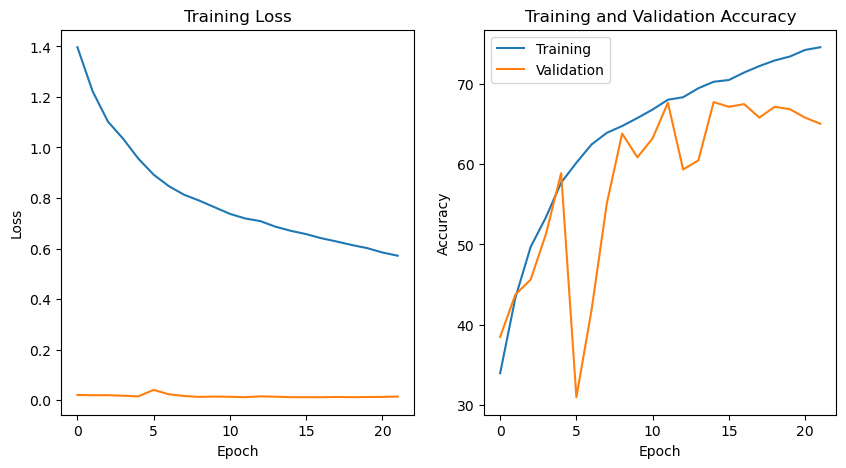

In [12]:
# Plot training accuracy and loss
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_losses,label='Training')
plt.plot(val_losses, label='Validation')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(train_accs, label='Training')
plt.plot(val_accs, label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Evaluation on test set and ROC curve
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # For ROC curve
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(outputs.cpu().numpy())  # Predicted probabilities for all classes

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
# Save the model
torch.save(model.state_dict(), 'face_age_detection_resnet18_4th_Try.pth')

Test Accuracy: 66.69%


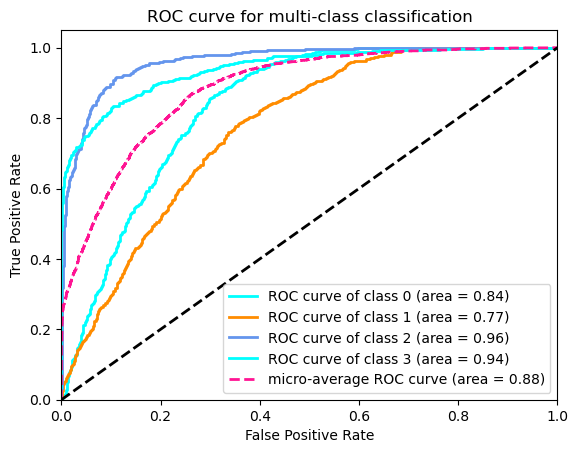

In [11]:
from sklearn.metrics import roc_curve, auc
num_classes = 4
# Convert labels to one-hot encoding
y_true_onehot = label_binarize(y_true, classes=np.arange(num_classes))

# Convert y_pred list to numpy array
y_pred = np.array(y_pred)

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_onehot.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class and micro-average
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw, linestyle='--',
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multi-class classification')
plt.legend(loc="lower right")
plt.show()


### Third Try - Includes Graphs(Train acc and Loss + ROC Curve) Added Early Stop and Data Augmentation
> 50epoch
>> Mistake! in the training acc plot. Plotted train loss instead of train acc.

Epoch 1/50, Train Loss: 1.3641, Train Accuracy: 37.06%, Validation Loss: 0.0206, Validation Accuracy: 38.39%
Epoch 2/50, Train Loss: 1.1158, Train Accuracy: 48.91%, Validation Loss: 0.0374, Validation Accuracy: 26.44%
Epoch 3/50, Train Loss: 1.0175, Train Accuracy: 53.89%, Validation Loss: 0.0193, Validation Accuracy: 45.65%
Epoch 4/50, Train Loss: 0.9387, Train Accuracy: 58.18%, Validation Loss: 0.0170, Validation Accuracy: 52.07%
Epoch 5/50, Train Loss: 0.9005, Train Accuracy: 59.92%, Validation Loss: 0.0142, Validation Accuracy: 57.94%
Epoch 6/50, Train Loss: 0.8682, Train Accuracy: 61.24%, Validation Loss: 0.0145, Validation Accuracy: 58.57%
Epoch 7/50, Train Loss: 0.8396, Train Accuracy: 62.74%, Validation Loss: 0.0129, Validation Accuracy: 63.72%
Epoch 8/50, Train Loss: 0.8217, Train Accuracy: 63.54%, Validation Loss: 0.0130, Validation Accuracy: 62.96%
Epoch 9/50, Train Loss: 0.7889, Train Accuracy: 65.39%, Validation Loss: 0.0128, Validation Accuracy: 62.92%
Epoch 10/50, Train 

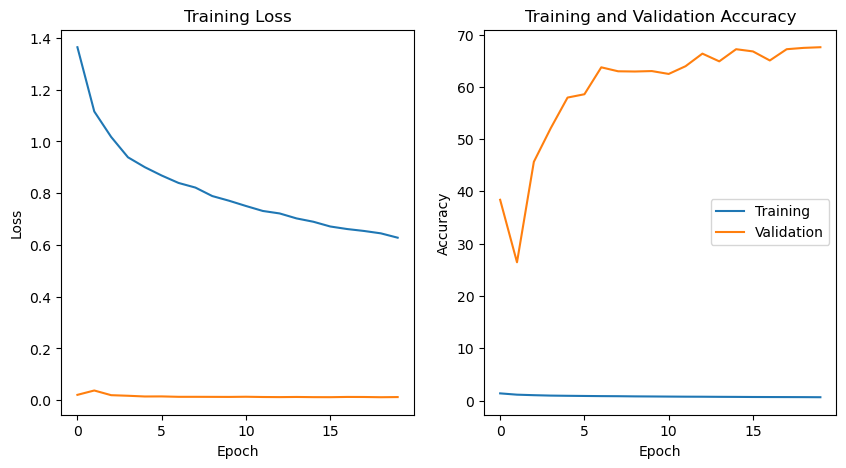

In [14]:
num_epochs = 50
train_losses = []
train_accs = []
val_accs = []
val_losses = []


patience = 7 
delta = 0.001 
best_val_loss = float('inf')
best_model_state_dict = None
counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        val_loss = 0.0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        
        val_loss /= len(val_loader.dataset) #Val loss and acc for each epoch
        val_acc = 100 * correct / total
        
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%')

        if val_loss < best_val_loss - delta: # validation loss improvement
            best_val_loss = val_loss
            best_model_state_dict = model.state_dict()
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print("Validation loss hasn't improved for {} epochs. Stopping early.".format(patience))
                break


model.load_state_dict(best_model_state_dict) #Load the best model to eval on test
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

# Plot training accuracy and loss
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_losses,label='Training')
plt.plot(val_losses, label='Validation')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(train_accs, label='Training')
plt.plot(val_accs, label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Evaluation on test set and ROC curve
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # For ROC curve
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(outputs.cpu().numpy())  # Predicted probabilities for all classes

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
# Save the model
torch.save(model.state_dict(), 'face_age_detection_resnet18_Third_Try.pth')

Test Accuracy: 66.99%


In [11]:
from sklearn.metrics import roc_curve, auc

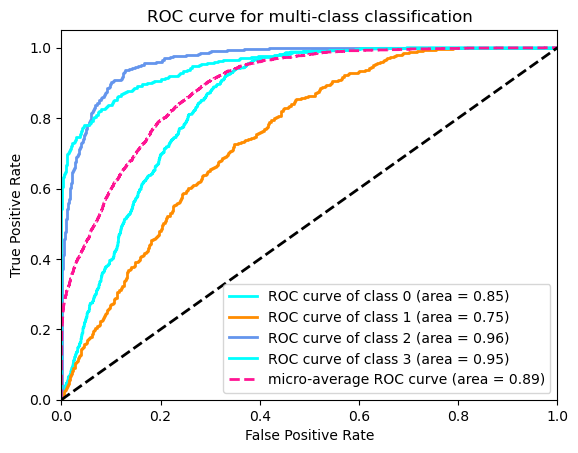

In [12]:
num_classes = 4
# Convert labels to one-hot encoding
y_true_onehot = label_binarize(y_true, classes=np.arange(num_classes))

# Convert y_pred list to numpy array
y_pred = np.array(y_pred)

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_onehot.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class and micro-average
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw, linestyle='--',
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multi-class classification')
plt.legend(loc="lower right")
plt.show()


### Second Try - Includes Graphs(Train acc and Loss + ROC Curve)  
> Fail -Over fitting.
> also forgot the val loss line :)
>>30Epoch Only!!!!!!!!!
>>Saving model.

`num_epochs = 30
train_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        
        val_loss /= len(val_loader.dataset) #Val loss and acc for each epoch
        val_acc = 100 * correct / total

        val_accs.append(val_acc)

        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, Validation Accuracy: {val_acc:.2f}%')

# Plot training accuracy and loss
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(train_accs)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
`



###### Output
<!-- # # -----------------------
Epoch 1/30, Train Loss: 1.1304, Train Accuracy: 49.18%, Validation Accuracy: 53.84%
Epoch 2/30, Train Loss: 0.9259, Train Accuracy: 58.66%, Validation Accuracy: 59.71%
Epoch 3/30, Train Loss: 0.8451, Train Accuracy: 62.45%, Validation Accuracy: 43.79%
Epoch 4/30, Train Loss: 0.7795, Train Accuracy: 65.59%, Validation Accuracy: 58.11%
Epoch 5/30, Train Loss: 0.7322, Train Accuracy: 67.85%, Validation Accuracy: 64.95%
Epoch 6/30, Train Loss: 0.6818, Train Accuracy: 69.53%, Validation Accuracy: 67.10%
Epoch 7/30, Train Loss: 0.6331, Train Accuracy: 72.07%, Validation Accuracy: 63.13%
Epoch 8/30, Train Loss: 0.5764, Train Accuracy: 74.96%, Validation Accuracy: 65.75%
Epoch 9/30, Train Loss: 0.5182, Train Accuracy: 77.99%, Validation Accuracy: 65.67%
Epoch 10/30, Train Loss: 0.4507, Train Accuracy: 81.03%, Validation Accuracy: 64.61%
Epoch 11/30, Train Loss: 0.3646, Train Accuracy: 85.06%, Validation Accuracy: 66.39%
Epoch 12/30, Train Loss: 0.2870, Train Accuracy: 88.67%, Validation Accuracy: 66.39%
Epoch 13/30, Train Loss: 0.2235, Train Accuracy: 91.75%, Validation Accuracy: 66.26%
Epoch 14/30, Train Loss: 0.1767, Train Accuracy: 93.67%, Validation Accuracy: 65.75%
Epoch 15/30, Train Loss: 0.1343, Train Accuracy: 95.73%, Validation Accuracy: 67.31%
 -->


> Stopped Training as it is overfitting.!

In [ ]:
# Evaluation on test set and ROC curve
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # For ROC curve
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(outputs[:, 1].cpu().numpy())  # Probability of positive class

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Save the model
torch.save(model.state_dict(), 'face_age_detection_resnet18.pth')

### First Try  - Just 10 epochs and Transforms Normalizd(Mean/Std)

In [28]:
# num_epochs = 10

# for epoch in range(num_epochs):
#     model.train()
#     train_loss = 0
#     correct = 0
#     total = 0
    
#     for images, labels in train_loader:
#         images = images.to(device)
#         labels = labels.to(device)

#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
        
#         _, predicted = torch.max(outputs.data, 1) #Train acc
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()
        
#         train_loss += loss.item() * labels.size(0) #loss

#     train_loss /= len(train_loader.dataset) #Train loss and acc for each epoch
#     train_accuracy = 100 * correct / total
    
#     # evaluate on validation set
#     model.eval()
#     with torch.no_grad():
#         correct = 0
#         total = 0
#         val_loss = 0
#         for images, labels in val_loader:
#             images = images.to(device)
#             labels = labels.to(device)

#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             val_loss += loss.item() * labels.size(0)
            
#             _, predicted = torch.max(outputs.data, 1) #validation accuracy
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#         val_loss /= len(val_loader.dataset) #Val loss and acc for each epoch
#         val_accuracy = 100 * correct / total
        
#     print(f'Epoch {epoch + 1}, Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

Epoch 1, Training Loss: 1.1079, Training Accuracy: 49.63%, Validation Loss: 0.9816, Validation Accuracy: 54.05%
Epoch 2, Training Loss: 0.9066, Training Accuracy: 59.66%, Validation Loss: 0.9381, Validation Accuracy: 56.93%
Epoch 3, Training Loss: 0.8149, Training Accuracy: 63.81%, Validation Loss: 0.9157, Validation Accuracy: 59.80%
Epoch 4, Training Loss: 0.7575, Training Accuracy: 66.44%, Validation Loss: 0.9113, Validation Accuracy: 58.91%
Epoch 5, Training Loss: 0.7069, Training Accuracy: 69.15%, Validation Loss: 1.1559, Validation Accuracy: 55.19%
Epoch 6, Training Loss: 0.6560, Training Accuracy: 71.23%, Validation Loss: 1.0346, Validation Accuracy: 57.22%
Epoch 7, Training Loss: 0.5984, Training Accuracy: 73.78%, Validation Loss: 0.8142, Validation Accuracy: 64.48%
Epoch 8, Training Loss: 0.5396, Training Accuracy: 76.87%, Validation Loss: 0.8305, Validation Accuracy: 66.77%
Epoch 9, Training Loss: 0.4718, Training Accuracy: 80.16%, Validation Loss: 0.8636, Validation Accuracy:

#### Output-1
 - Epoch 1, Training Loss: 1.1079, Training Accuracy: 49.63%, Validation Loss: 0.9816, Validation Accuracy: 54.05%
 - Epoch 2, Training Loss: 0.9066, Training Accuracy: 59.66%, Validation Loss: 0.9381, Validation Accuracy: 56.93%
 - Epoch 3, Training Loss: 0.8149, Training Accuracy: 63.81%, Validation Loss: 0.9157, Validation Accuracy: 59.80%
 - Epoch 4, Training Loss: 0.7575, Training Accuracy: 66.44%, Validation Loss: 0.9113, Validation Accuracy: 58.91%
 - Epoch 5, Training Loss: 0.7069, Training Accuracy: 69.15%, Validation Loss: 1.1559, Validation Accuracy: 55.19%
 - Epoch 6, Training Loss: 0.6560, Training Accuracy: 71.23%, Validation Loss: 1.0346, Validation Accuracy: 57.22%
 - Epoch 7, Training Loss: 0.5984, Training Accuracy: 73.78%, Validation Loss: 0.8142, Validation Accuracy: 64.48%
 - Epoch 8, Training Loss: 0.5396, Training Accuracy: 76.87%, Validation Loss: 0.8305, Validation Accuracy: 66.77%
 - Epoch 9, Training Loss: 0.4718, Training Accuracy: 80.16%, Validation Loss: 0.8636, Validation Accuracy: 64.32%
 - Epoch 10, Training Loss: 0.3927, Training Accuracy: 83.87%, Validation Loss: 1.1208, Validation Accuracy: 61.57%
 
 
 
 - Test Accuracy: 61.22%

In [29]:
# # Test the model on the test set
# model.eval()
# with torch.no_grad():
#     correct = 0
#     total = 0
#     for images, labels in test_loader:
#         images = images.to(device)
#         labels = labels.to(device)

#         outputs = model(images)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

#     accuracy = 100 * correct / total
#     print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 61.22%
